In [426]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
%matplotlib inline

In [427]:
!git clone 'https://github.com/sachinkavindaa/Machine-learning-with-Python'

fatal: destination path 'Machine-learning-with-Python' already exists and is not an empty directory.


In [428]:
df = pd.read_csv('/content/Machine-learning-with-Python/ML/Book/Book_1.csv')
df.head()

,raw_1,raw_2,raw_3,raw_4,raw_5,raw_6,raw_7,raw_8,raw_9(A1),raw_10(C1),raw_11(A2),raw_12(C2)
0,1.0,0.2,0.8,0.0060,0.747,0.0064,0.283,0.000,0.05700,0.00,0.814,0.81
1,1.0,0.6,0.4,0.0019,0.603,0.0030,0.156,0.000,0.04865,0.00,0.667,0.67
2,1.0,0.9,0.1,0.0005,0.351,0.0018,0.041,0.000,0.11600,0.00,0.358,0.36
3,0.1,0.1,0.9,0.0650,0.883,0.0660,0.337,0.150,0.53000,0.53,0.540,0.55
4,0.1,0.4,0.6,0.0130,0.701,0.0140,0.399,0.497,0.12000,0.12,0.489,0.48


In [429]:
merged_1 = df[[	'raw_1','raw_2','raw_3','raw_4','raw_5','raw_6','raw_7','raw_8','raw_11(A2)']]
merged_1.head()

,raw_1,raw_2,raw_3,raw_4,raw_5,raw_6,raw_7,raw_8,raw_11(A2)
0,1.0,0.2,0.8,0.0060,0.747,0.0064,0.283,0.000,0.814
1,1.0,0.6,0.4,0.0019,0.603,0.0030,0.156,0.000,0.667
2,1.0,0.9,0.1,0.0005,0.351,0.0018,0.041,0.000,0.358
3,0.1,0.1,0.9,0.0650,0.883,0.0660,0.337,0.150,0.540
4,0.1,0.4,0.6,0.0130,0.701,0.0140,0.399,0.497,0.489


In [430]:
from sklearn.model_selection import train_test_split

In [431]:
X = merged_1.drop('raw_11(A2)',axis = 1).values
y = merged_1['raw_11(A2)'].values

In [432]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 1)

In [433]:
X_train.shape

(10, 8)

In [434]:
X_test.shape

(4, 8)

In [435]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop

In [436]:
model = Sequential()

model.add(Dense(8, input_dim = 8,  activation = 'relu'))
keras.layers.Dropout(0.2)
model.add(Dense(3, activation = 'relu'))
keras.layers.Dropout(0.2)
model.add(Dense(3, activation = 'relu'))
#model.add(Dense(164, activation = 'relu'))
keras.layers.Dropout(0.2)
model.add(Dense(1, activation = 'sigmoid'))

In [437]:
model.compile(optimizer= 'adam', loss ='binary_crossentropy', ) 

In [438]:
model.fit(X_train,y_train,epochs=800)

Epoch 1/800
1/1 [==============================] - 0s 2ms/step - loss: 0.6762
Epoch 2/800
1/1 [==============================] - 0s 2ms/step - loss: 0.6756
Epoch 3/800
1/1 [==============================] - 0s 7ms/step - loss: 0.6749
Epoch 4/800
1/1 [==============================] - 0s 2ms/step - loss: 0.6743
Epoch 5/800
1/1 [==============================] - 0s 2ms/step - loss: 0.6737
Epoch 6/800
1/1 [==============================] - 0s 2ms/step - loss: 0.6732
Epoch 7/800
1/1 [==============================] - 0s 2ms/step - loss: 0.6726
Epoch 8/800
1/1 [==============================] - 0s 6ms/step - loss: 0.6721
Epoch 9/800
1/1 [==============================] - 0s 1ms/step - loss: 0.6716
Epoch 10/800
1/1 [==============================] - 0s 4ms/step - loss: 0.6711
Epoch 11/800
1/1 [==============================] - 0s 1ms/step - loss: 0.6705
Epoch 12/800
1/1 [==============================] - 0s 2ms/step - loss: 0.6700
Epoch 13/800
1/1 [==============================] - 0s 3ms/st

In [439]:
loss_df = pd.DataFrame(model.history.history)


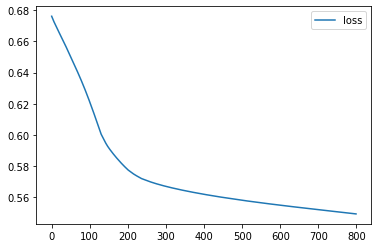

In [440]:
loss_df.plot()

In [441]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 2ms/step - loss: 0.6572


0.6571680903434753

In [442]:
model.evaluate(X_train,y_train)

1/1 [==============================] - 0s 2ms/step - loss: 0.5492


0.5491659045219421

In [443]:
pred = model.predict(X_test)

In [444]:
pred= pd.Series(pred.reshape(4,))

In [445]:
pred_df = pd.DataFrame(y_test,columns=['Test True Y'])

In [446]:
pred_df = pd.concat([pred_df,pred],axis = 1)

In [447]:
pred_df.columns = ['Test True Y','Model Prediction']
pred_df

,Test True Y,Model Prediction
0,0.540,0.658683
1,0.506,0.604022
2,0.152,0.227712
3,0.358,0.580027


In [448]:
y_test

array([0.54 , 0.506, 0.152, 0.358])

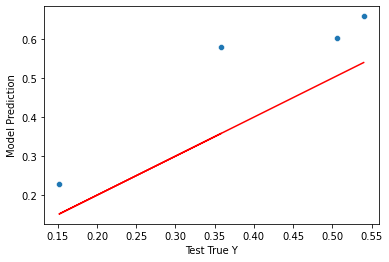

In [449]:
sns.scatterplot(x = 'Test True Y', y = 'Model Prediction', data = pred_df)
plt.plot(y_test,y_test,'r')

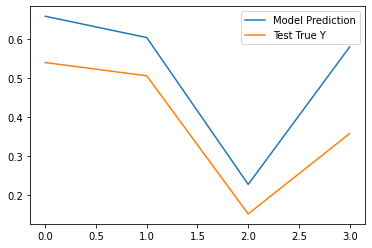

In [450]:
from matplotlib import pyplot
pyplot.plot(pred, label='Model Prediction')
pyplot.plot(y_test, label='Test True Y')
pyplot.legend()
pyplot.show()